We have implemented the bootstrapping method in the file `bootstrap.py`. In this notebook, we illustrate it on the calculation of an inegral using Monte-Carlo integration. You may want to have a look at the implementation first.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from bootstrap import bootstrap

We use Monte-Carlo integration to calculate the following integral: $$\int_0^1 e^x dx.$$ It's value is equal to 

In [2]:
true_value = np.e - 1
true_value

1.718281828459045

In [3]:
def montecarlo(uniform_draws):
    exp_draws = np.exp(uniform_draws)
    integral = np.mean(exp_draws)
    return integral

In [4]:
largest = 10000
all_draws = np.random.uniform(size=largest)

In [5]:
r = range(100, largest)

In [6]:
results = [bootstrap(montecarlo, all_draws[:r]) for r in tqdm(r)]

100%|██████████| 9900/9900 [01:56<00:00, 84.84it/s] 


In [7]:
estimates, mse, CI_low, CI_high = zip(*results)
estimates = np.array(estimates)
mse = np.array(mse)
rmse = np.sqrt(mse)

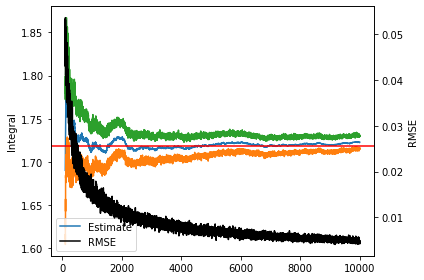

In [8]:
_, ax1 = plt.subplots()
ax1.set_ylabel('Integral')
plt_estimate = ax1.plot(r, estimates, label='Estimate')
ax1.plot(r, CI_low, r, CI_high)
ax1.axhline(y=true_value, color='r', linestyle='-', label='True value')
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE')
plt_rmse = ax2.plot(r, rmse, color='black', label='RMSE')
the_plots = plt_estimate + plt_rmse
labels = [ell.get_label() for ell in the_plots]
ax1.legend(the_plots, labels, loc=3)
plt.tight_layout()
plt.show()